---------  ------------------  ------------------  ------------------  -------------------
Iteration  Abscissa            Ordinate            Objective function  Difference
0          477792.5714868709   2222486.0126646003  1292009.8592769501  0
1          477587.00932484615  2222295.4179039546  1249084.6988095895  42925.160467360634
2          477443.7302969548   2222176.299610891   1227221.5404000483  21863.15840954124
3          477344.9680253508   2222120.90726542    1217677.8043235082  9543.73607654008
4          477279.18753564556  2222100.8443973945  1213516.5538878986  4161.250435609603
5          477235.80134190945  2222095.9752559895  1211564.4962063222  1952.0576815763488
6          477206.5382298591   2222096.6162860948  1210564.6227142494  999.873492072802
7          477186.0338889004   2222098.829271605   1210011.0510561105  553.5716581388842
8          477171.09811971744  2222101.214824457   1209685.1029124197  325.9481436908245
9          477159.8523686047   2222103.358

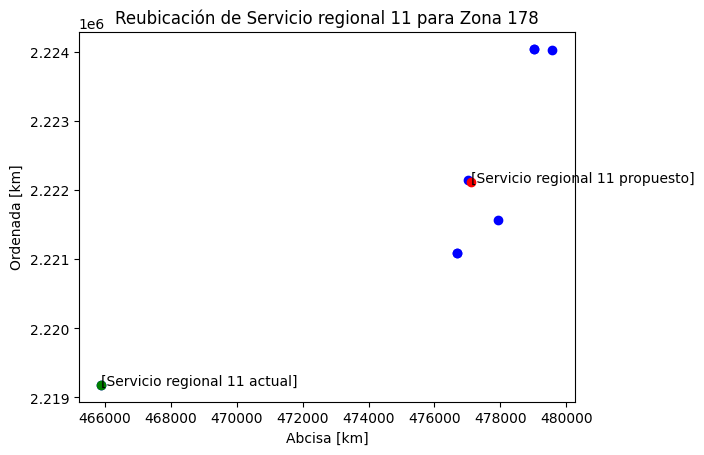

Eps =  0.1
 ----> Final coordinates of the Servicio Regional <---- 
Abscissa:  477110.0352439774 , Ordenada:  2222115.2055771905
Resultados guardados en resultados.xlsx


In [62]:
import csv
from tabulate import tabulate
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl

nodes = []
eps = 0.1

# ----> Transport costs per kilometer and for each book of transported 
c = 497.3

class Wells:
    def __init__(self, id, abscissa, ordinate, d):
        self.id = id
        self.abscissa = abscissa
        self.ordinate = ordinate
        self.d = d

def SER_REG_11_ZONA_178():
    # ----> Function that initializes variables x (0) and y (0) (center of mass)
    def zeroPoint(nodes):
        x0_n = 0
        y0_n = 0
        den = 0
        for i in nodes:
            x0_n += i.abscissa * i.d
            y0_n += i.ordinate * i.d
            den += i.d
        x0 = x0_n / den
        y0 = y0_n / den
        return [x0, y0]

    # ----> Method to calculate the Objective function
    def objectiveFunction(nodes, x, y):
        f = 0
        for i in nodes:
            f += c * i.d * pow(pow(i.abscissa - x, 2) + pow(i.ordinate - y, 2), 0.5)
        return f

    # ----> Method to calculate x(h) and y(h)
    def solutionUpdate(nodes, x, y):
        xh_n = 0
        yh_n = 0
        den = 0
        for i in nodes:
            xh_n += i.d * i.abscissa / pow(pow(i.abscissa - x, 2) + pow(i.ordinate - y, 2), 0.5)
            yh_n += i.d * i.ordinate / pow(pow(i.abscissa - x, 2) + pow(i.ordinate - y, 2), 0.5)
            den += i.d / pow(pow(i.abscissa - x, 2) + pow(i.ordinate - y, 2), 0.5)

        xh = xh_n / den
        yh = yh_n / den
        return [xh, yh]

    # ----> Method that implements the heuristic algorithm, updating x and y to each iteration as long as: diff > eps=0.1
    def heuristic(nodes):
        start = zeroPoint(nodes)
        x = start[0]
        y = start[1]

        # ----> Initialization of diff > eps, where: diff = f_h-1 - f_h
        diff = 1
        h = 0

        # ----> Column names
        table = [["Iteration", "Abscissa", "Ordinate", "Objective function", "Difference"]]

        while diff > eps:
            if h == 0: diff = 0

            # ----> Step 1: Objective Function f0 calculation according to (x_0, y_0) in zeroPoint
            f0 = objectiveFunction(nodes, x, y)

            # ----> Add a row to the table
            table.append([h, x, y, f0, diff])

            # ----> Calculate [x_h, y_h]
            update = solutionUpdate(nodes, x, y)

            # ----> Calculate Objective Function f1 according to (x_h, y_h) in update
            f1 = objectiveFunction(nodes, update[0], update[1])
            diff = f0 - f1

            # ----> Update the x and y coordinates for the calculation of f0 to the next step
            x = update[0]
            y = update[1]
            h += 1

        # ----> Add the last line to the table containing the optimal solution
        table.append([h, x, y, f1, diff])
        print(tabulate(table))
        return table, [x, y]

    with open('SER REG 11- ZONA 178.csv') as csvfile:
        reader = csv.reader(csvfile)
        for i in reader:
            nodes.append(Wells(int(i[0]), float(i[1]), float(i[2]), float(i[3])))

    table, RegCenter = heuristic(nodes)

    data = pd.read_csv('SER REG 11- ZONA 178.csv', header=None)

    # ----> Construction of the scatterplot
    plt.scatter([node.abscissa for node in nodes], [node.ordinate for node in nodes], color='blue')
    plt.scatter(nodes[0].abscissa, nodes[0].ordinate, color='green')
    plt.text(nodes[0].abscissa, nodes[0].ordinate, '[Servicio regional 11 actual]')
    plt.scatter(RegCenter[0], RegCenter[1], color='red')
    plt.text(RegCenter[0], RegCenter[1], '[Servicio regional 11 propuesto]')
    plt.title('Reubicación de Servicio regional 11 para Zona 178')
    plt.ylabel('Ordenada [km]')
    plt.xlabel('Abcisa [km]')
    plt.savefig('scatterplot.png')
    plt.show()

    print("Eps = ", eps)
    print(' ----> Final coordinates of the Servicio Regional <---- ')
    print("Abscissa: ", RegCenter[0], ", Ordenada: ", RegCenter[1])

    # ----> Save results to Excel
    # Convert table data to appropriate types
    table_df = pd.DataFrame(table[1:], columns=table[0])
    table_df = table_df.astype({
        'Iteration': int,
        'Abscissa': float,
        'Ordinate': float,
        'Objective function': float,
        'Difference': float
    })

    writer = pd.ExcelWriter('Resultados Zona 178 SR11.xlsx', engine='openpyxl')

    # Save the iterations table
    table_df.to_excel(writer, sheet_name='Iteraciones', index=False)

    # Save the initial data
    data.columns = ['ID', 'Abscissa', 'Ordinate', 'D']
    data.to_excel(writer, sheet_name='Datos Iniciales', index=False)

    # Save the final results
    final_result = pd.DataFrame({
        'Abscissa': [RegCenter[0]],
        'Ordinate': [RegCenter[1]],
        'Eps': [eps]
    })
    final_result.to_excel(writer, sheet_name='Resultado Final', index=False)

    # Add the scatterplot
    workbook = writer.book
    worksheet = workbook.create_sheet('Scatterplot')
    img = openpyxl.drawing.image.Image('scatterplot.png')
    worksheet.add_image(img, 'A1')

    writer.book.save('Resultados Zona 178 SR11.xlsx')

    print('Resultados guardados en resultados.xlsx')

SER_REG_11_ZONA_178()